In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

[array([[171, 180, 186, ..., 220, 213, 207],
       [172, 179, 186, ..., 220, 215, 211],
       [171, 179, 181, ..., 219, 217, 215],
       ...,
       [133, 137, 140, ...,   5,   4,   4],
       [129, 133, 136, ...,   3,   3,   3],
       [126, 130, 134, ...,   2,   2,   2]], dtype=uint8), 0]


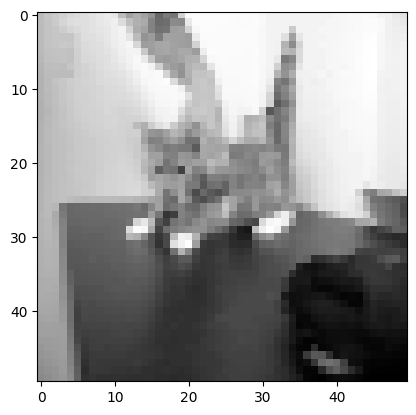

In [2]:
import pickle

# Load the list
with open('training_data.pkl', 'rb') as f:
    x = pickle.load(f)
print(x[0])
plt.imshow(x[0][0],cmap='gray')

In [3]:
images = np.array([item[0] for item in x])
labels = np.array([item[1] for item in x])
# 0 cat , 1 dog

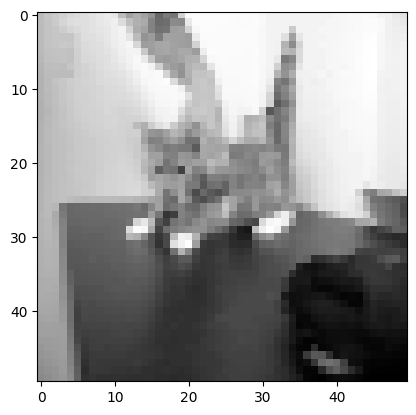

In [4]:
# Normalize images
images = images/255.0
plt.imshow(images[0],cmap='gray')

In [5]:
from sklearn.model_selection import train_test_split


train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.2,random_state=42)
# train_labels.shape

In [6]:
train_images = train_images.reshape(-1,50,50,1)
test_images = test_images.reshape(-1,50,50,1)

In [13]:
# CNN = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (1, 1), activation='relu',input_shape=(50,50,1),padding="valid"),
#     tf.keras.layers.MaxPool2D(pool_size=2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding="valid"),
#     tf.keras.layers.MaxPool2D(pool_size=2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding="valid"),
#     tf.keras.layers.MaxPool2D(pool_size=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128,activation='relu'),
#     tf.keras.layers.Dense(2,activation='softmax')
# ])
CNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(50,50,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
CNN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# CNN.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
CNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       495,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,313 (2.03 MB)

 Trainable params: 533,313 (2.03 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
try:
    history = CNN.fit(images,labels,validation_split=0.1,epochs=10,batch_size=32)
except Exception as e:
    print(f"CNN.fit() failed: {e.args[0]}")

Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7540 - loss: 0.5082 - val_accuracy: 0.7916 - val_loss: 0.4359
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7832 - loss: 0.4634 - val_accuracy: 0.8529 - val_loss: 0.3404
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.7910 - loss: 0.4480 - val_accuracy: 0.8088 - val_loss: 0.4196
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.7983 - loss: 0.4359 - val_accuracy: 0.8024 - val_loss: 0.4165
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8148 - loss: 0.4104 - val_accuracy: 0.7832 - val_loss: 0.4597
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.8218 - loss: 0.3965 - val_accuracy: 0.8048 - val_loss: 0.4286
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.8310 - loss: 0.3730 - val_accuracy: 0.7351 - val_loss: 0.5689
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.8369 - loss: 0.3583 - 

In [ ]:
mets = CNN.evaluate(test_images,test_labels)
mets

In [ ]:
try:
    eval_img = test_images[0]
    y_pred = CNN.predict(eval_img)
    print(train_images[0].shape)
    plt.imshow(train_images[0])
    print(y_pred)
except Exception as e:
    print(e.args[0])